# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [ ]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [ ]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse ):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 50 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6142... Generator Loss: 1.9441
Epoch 1/2... Discriminator Loss: 1.3159... Generator Loss: 4.7039
Epoch 1/2... Discriminator Loss: 1.7667... Generator Loss: 0.4208
Epoch 1/2... Discriminator Loss: 0.7776... Generator Loss: 2.9278
Epoch 1/2... Discriminator Loss: 0.6129... Generator Loss: 1.7390
Epoch 1/2... Discriminator Loss: 0.7884... Generator Loss: 1.3025
Epoch 1/2... Discriminator Loss: 0.8005... Generator Loss: 1.3274
Epoch 1/2... Discriminator Loss: 0.9413... Generator Loss: 1.2271
Epoch 1/2... Discriminator Loss: 0.8068... Generator Loss: 2.7355
Epoch 1/2... Discriminator Loss: 1.6579... Generator Loss: 4.9131


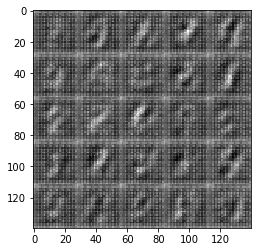

Epoch 1/2... Discriminator Loss: 0.7381... Generator Loss: 1.6320
Epoch 1/2... Discriminator Loss: 0.8045... Generator Loss: 2.8277
Epoch 1/2... Discriminator Loss: 0.6775... Generator Loss: 1.5355
Epoch 1/2... Discriminator Loss: 2.2915... Generator Loss: 4.9363
Epoch 1/2... Discriminator Loss: 0.9834... Generator Loss: 2.6611
Epoch 1/2... Discriminator Loss: 1.0731... Generator Loss: 3.0279
Epoch 1/2... Discriminator Loss: 0.6518... Generator Loss: 1.7369
Epoch 1/2... Discriminator Loss: 0.9027... Generator Loss: 3.1020
Epoch 1/2... Discriminator Loss: 0.9310... Generator Loss: 0.8984
Epoch 1/2... Discriminator Loss: 0.7841... Generator Loss: 1.1836


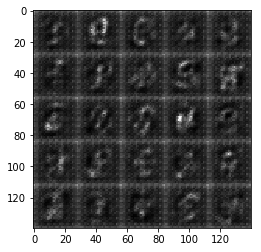

Epoch 1/2... Discriminator Loss: 0.7664... Generator Loss: 1.1906
Epoch 1/2... Discriminator Loss: 1.6324... Generator Loss: 0.4190
Epoch 1/2... Discriminator Loss: 0.7199... Generator Loss: 2.3646
Epoch 1/2... Discriminator Loss: 0.6361... Generator Loss: 2.3096
Epoch 1/2... Discriminator Loss: 0.5913... Generator Loss: 1.9998
Epoch 1/2... Discriminator Loss: 0.6751... Generator Loss: 2.8618
Epoch 1/2... Discriminator Loss: 0.7741... Generator Loss: 1.1643
Epoch 1/2... Discriminator Loss: 0.8109... Generator Loss: 1.0864
Epoch 1/2... Discriminator Loss: 0.6935... Generator Loss: 1.3289
Epoch 1/2... Discriminator Loss: 0.7908... Generator Loss: 2.3880


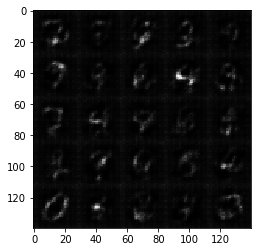

Epoch 1/2... Discriminator Loss: 0.6841... Generator Loss: 1.5043
Epoch 1/2... Discriminator Loss: 0.5882... Generator Loss: 1.7744
Epoch 1/2... Discriminator Loss: 0.5643... Generator Loss: 2.0461
Epoch 1/2... Discriminator Loss: 0.6065... Generator Loss: 1.6822
Epoch 1/2... Discriminator Loss: 0.6082... Generator Loss: 1.9355
Epoch 1/2... Discriminator Loss: 0.5912... Generator Loss: 1.9767
Epoch 1/2... Discriminator Loss: 0.6265... Generator Loss: 1.6091
Epoch 1/2... Discriminator Loss: 0.6528... Generator Loss: 2.5943
Epoch 1/2... Discriminator Loss: 0.6042... Generator Loss: 2.5662
Epoch 1/2... Discriminator Loss: 0.6250... Generator Loss: 1.7185


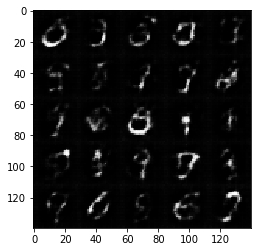

Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 0.6185
Epoch 1/2... Discriminator Loss: 0.6369... Generator Loss: 1.5872
Epoch 1/2... Discriminator Loss: 0.6211... Generator Loss: 2.6432
Epoch 1/2... Discriminator Loss: 0.8364... Generator Loss: 1.1950
Epoch 1/2... Discriminator Loss: 0.8386... Generator Loss: 1.0913
Epoch 1/2... Discriminator Loss: 0.7686... Generator Loss: 1.1752
Epoch 1/2... Discriminator Loss: 0.5552... Generator Loss: 1.8668
Epoch 1/2... Discriminator Loss: 0.6754... Generator Loss: 1.5395
Epoch 1/2... Discriminator Loss: 0.6366... Generator Loss: 2.0599
Epoch 1/2... Discriminator Loss: 0.6331... Generator Loss: 1.7266


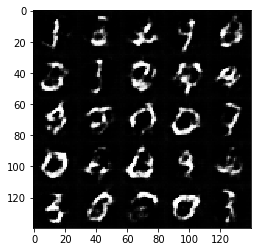

Epoch 1/2... Discriminator Loss: 0.6289... Generator Loss: 1.7722
Epoch 1/2... Discriminator Loss: 0.9989... Generator Loss: 0.8354
Epoch 1/2... Discriminator Loss: 0.8711... Generator Loss: 2.5647
Epoch 1/2... Discriminator Loss: 0.6686... Generator Loss: 1.6518
Epoch 1/2... Discriminator Loss: 0.6725... Generator Loss: 1.5059
Epoch 1/2... Discriminator Loss: 0.6315... Generator Loss: 1.5947
Epoch 1/2... Discriminator Loss: 0.6373... Generator Loss: 1.6217
Epoch 1/2... Discriminator Loss: 0.6620... Generator Loss: 1.5690
Epoch 1/2... Discriminator Loss: 0.5931... Generator Loss: 1.9428
Epoch 1/2... Discriminator Loss: 1.2761... Generator Loss: 0.7841


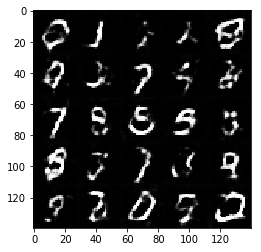

Epoch 1/2... Discriminator Loss: 0.6935... Generator Loss: 1.5303
Epoch 1/2... Discriminator Loss: 0.6486... Generator Loss: 1.6896
Epoch 1/2... Discriminator Loss: 0.5956... Generator Loss: 2.1379
Epoch 1/2... Discriminator Loss: 0.9409... Generator Loss: 0.9366
Epoch 1/2... Discriminator Loss: 0.7089... Generator Loss: 1.3578
Epoch 1/2... Discriminator Loss: 1.4491... Generator Loss: 0.5406
Epoch 1/2... Discriminator Loss: 1.2278... Generator Loss: 2.4848
Epoch 1/2... Discriminator Loss: 0.6692... Generator Loss: 1.8991
Epoch 1/2... Discriminator Loss: 0.7247... Generator Loss: 1.3499
Epoch 1/2... Discriminator Loss: 0.6994... Generator Loss: 1.5005


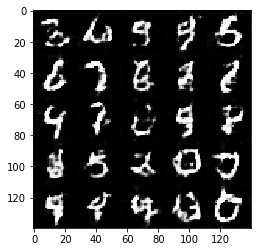

Epoch 1/2... Discriminator Loss: 0.6747... Generator Loss: 2.0568
Epoch 1/2... Discriminator Loss: 0.5920... Generator Loss: 1.7971
Epoch 1/2... Discriminator Loss: 0.8653... Generator Loss: 1.2537
Epoch 1/2... Discriminator Loss: 0.7407... Generator Loss: 1.9575
Epoch 1/2... Discriminator Loss: 0.6523... Generator Loss: 1.5999
Epoch 1/2... Discriminator Loss: 0.7183... Generator Loss: 1.5379
Epoch 1/2... Discriminator Loss: 0.6926... Generator Loss: 1.6012
Epoch 1/2... Discriminator Loss: 0.7482... Generator Loss: 2.0061
Epoch 1/2... Discriminator Loss: 0.9847... Generator Loss: 2.5165
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 1.1141


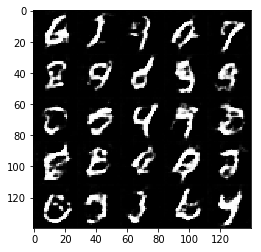

Epoch 1/2... Discriminator Loss: 1.5542... Generator Loss: 3.4370
Epoch 1/2... Discriminator Loss: 1.4753... Generator Loss: 0.5115
Epoch 1/2... Discriminator Loss: 0.8863... Generator Loss: 1.0848
Epoch 1/2... Discriminator Loss: 0.7040... Generator Loss: 1.5479
Epoch 1/2... Discriminator Loss: 0.8974... Generator Loss: 1.0077
Epoch 1/2... Discriminator Loss: 0.6955... Generator Loss: 1.4081
Epoch 1/2... Discriminator Loss: 0.6902... Generator Loss: 1.4589
Epoch 1/2... Discriminator Loss: 0.7086... Generator Loss: 1.3041
Epoch 1/2... Discriminator Loss: 0.6819... Generator Loss: 1.4103
Epoch 1/2... Discriminator Loss: 1.0369... Generator Loss: 0.8098


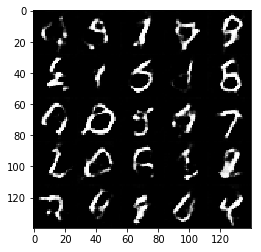

Epoch 1/2... Discriminator Loss: 0.6910... Generator Loss: 1.5514
Epoch 1/2... Discriminator Loss: 0.8044... Generator Loss: 1.1381
Epoch 1/2... Discriminator Loss: 0.7996... Generator Loss: 1.1384
Epoch 2/2... Discriminator Loss: 0.8621... Generator Loss: 1.0517
Epoch 2/2... Discriminator Loss: 0.6661... Generator Loss: 2.0380
Epoch 2/2... Discriminator Loss: 1.0936... Generator Loss: 2.0696
Epoch 2/2... Discriminator Loss: 0.7411... Generator Loss: 1.4306
Epoch 2/2... Discriminator Loss: 0.7303... Generator Loss: 1.4981
Epoch 2/2... Discriminator Loss: 0.9084... Generator Loss: 0.9640
Epoch 2/2... Discriminator Loss: 0.6437... Generator Loss: 1.5148


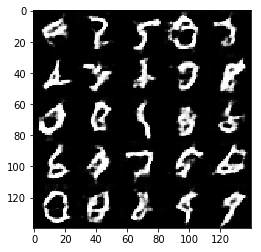

Epoch 2/2... Discriminator Loss: 0.6749... Generator Loss: 1.7267
Epoch 2/2... Discriminator Loss: 0.8038... Generator Loss: 1.6122
Epoch 2/2... Discriminator Loss: 0.7630... Generator Loss: 2.2979
Epoch 2/2... Discriminator Loss: 0.8822... Generator Loss: 1.0925
Epoch 2/2... Discriminator Loss: 0.6908... Generator Loss: 1.4924
Epoch 2/2... Discriminator Loss: 1.2732... Generator Loss: 0.7042
Epoch 2/2... Discriminator Loss: 0.8596... Generator Loss: 1.0904
Epoch 2/2... Discriminator Loss: 0.8716... Generator Loss: 1.8212
Epoch 2/2... Discriminator Loss: 0.8675... Generator Loss: 1.0804
Epoch 2/2... Discriminator Loss: 0.6328... Generator Loss: 1.7504


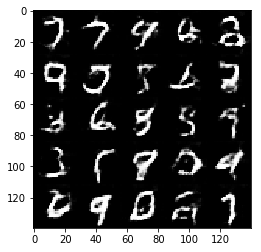

Epoch 2/2... Discriminator Loss: 0.7393... Generator Loss: 1.3960
Epoch 2/2... Discriminator Loss: 1.8735... Generator Loss: 4.2642
Epoch 2/2... Discriminator Loss: 0.6519... Generator Loss: 1.5697
Epoch 2/2... Discriminator Loss: 0.8967... Generator Loss: 1.8764
Epoch 2/2... Discriminator Loss: 0.6928... Generator Loss: 1.4095
Epoch 2/2... Discriminator Loss: 1.7472... Generator Loss: 3.8823
Epoch 2/2... Discriminator Loss: 0.8372... Generator Loss: 1.3490
Epoch 2/2... Discriminator Loss: 1.1621... Generator Loss: 0.6591
Epoch 2/2... Discriminator Loss: 0.9776... Generator Loss: 0.8438
Epoch 2/2... Discriminator Loss: 0.9785... Generator Loss: 0.9129


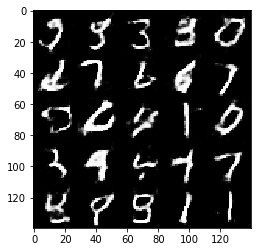

Epoch 2/2... Discriminator Loss: 1.1513... Generator Loss: 0.7250
Epoch 2/2... Discriminator Loss: 0.7570... Generator Loss: 1.3685
Epoch 2/2... Discriminator Loss: 0.8054... Generator Loss: 1.1797
Epoch 2/2... Discriminator Loss: 0.8151... Generator Loss: 1.5036
Epoch 2/2... Discriminator Loss: 0.7247... Generator Loss: 1.3650
Epoch 2/2... Discriminator Loss: 1.0839... Generator Loss: 2.6348
Epoch 2/2... Discriminator Loss: 0.7402... Generator Loss: 1.8851
Epoch 2/2... Discriminator Loss: 1.0145... Generator Loss: 0.8542
Epoch 2/2... Discriminator Loss: 0.9126... Generator Loss: 0.9538
Epoch 2/2... Discriminator Loss: 0.6668... Generator Loss: 1.5010


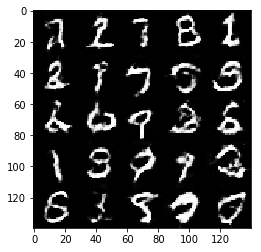

Epoch 2/2... Discriminator Loss: 1.5022... Generator Loss: 0.4852
Epoch 2/2... Discriminator Loss: 0.9000... Generator Loss: 2.1223
Epoch 2/2... Discriminator Loss: 0.7151... Generator Loss: 1.5359
Epoch 2/2... Discriminator Loss: 0.6924... Generator Loss: 2.1253
Epoch 2/2... Discriminator Loss: 0.8332... Generator Loss: 1.0824
Epoch 2/2... Discriminator Loss: 0.7368... Generator Loss: 1.2969
Epoch 2/2... Discriminator Loss: 0.6687... Generator Loss: 1.5209
Epoch 2/2... Discriminator Loss: 0.6271... Generator Loss: 1.5460
Epoch 2/2... Discriminator Loss: 1.1222... Generator Loss: 0.7500
Epoch 2/2... Discriminator Loss: 0.7933... Generator Loss: 2.2276


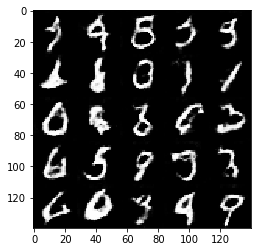

Epoch 2/2... Discriminator Loss: 0.8973... Generator Loss: 2.2010
Epoch 2/2... Discriminator Loss: 0.8776... Generator Loss: 1.0328
Epoch 2/2... Discriminator Loss: 0.8836... Generator Loss: 0.9958
Epoch 2/2... Discriminator Loss: 1.1039... Generator Loss: 0.7224
Epoch 2/2... Discriminator Loss: 2.0044... Generator Loss: 0.2690
Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 0.9655
Epoch 2/2... Discriminator Loss: 0.7365... Generator Loss: 1.3081
Epoch 2/2... Discriminator Loss: 0.9794... Generator Loss: 0.9147
Epoch 2/2... Discriminator Loss: 0.8196... Generator Loss: 2.3152
Epoch 2/2... Discriminator Loss: 0.7517... Generator Loss: 1.2360


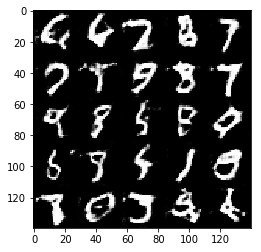

Epoch 2/2... Discriminator Loss: 1.1936... Generator Loss: 0.6284
Epoch 2/2... Discriminator Loss: 1.0886... Generator Loss: 0.7760
Epoch 2/2... Discriminator Loss: 0.8092... Generator Loss: 1.2133
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 2.3771
Epoch 2/2... Discriminator Loss: 0.7711... Generator Loss: 1.2174
Epoch 2/2... Discriminator Loss: 0.7477... Generator Loss: 1.3465
Epoch 2/2... Discriminator Loss: 0.9241... Generator Loss: 1.4353
Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 1.4873
Epoch 2/2... Discriminator Loss: 0.8194... Generator Loss: 1.1726
Epoch 2/2... Discriminator Loss: 0.8979... Generator Loss: 1.0750


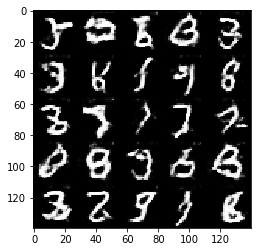

Epoch 2/2... Discriminator Loss: 1.5949... Generator Loss: 0.4415
Epoch 2/2... Discriminator Loss: 1.1565... Generator Loss: 0.6881
Epoch 2/2... Discriminator Loss: 0.7265... Generator Loss: 1.4839
Epoch 2/2... Discriminator Loss: 1.1120... Generator Loss: 0.7790
Epoch 2/2... Discriminator Loss: 0.7837... Generator Loss: 1.3324
Epoch 2/2... Discriminator Loss: 1.1333... Generator Loss: 0.7517
Epoch 2/2... Discriminator Loss: 1.0207... Generator Loss: 0.9173
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 0.9738
Epoch 2/2... Discriminator Loss: 0.7586... Generator Loss: 1.7162
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 1.1363


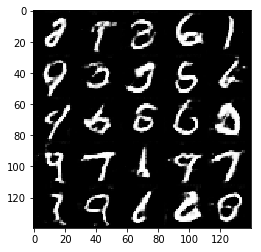

Epoch 2/2... Discriminator Loss: 0.9515... Generator Loss: 0.8912
Epoch 2/2... Discriminator Loss: 0.8484... Generator Loss: 1.5027
Epoch 2/2... Discriminator Loss: 0.7851... Generator Loss: 1.8309
Epoch 2/2... Discriminator Loss: 0.7974... Generator Loss: 1.2028
Epoch 2/2... Discriminator Loss: 1.1377... Generator Loss: 2.9690
Epoch 2/2... Discriminator Loss: 0.8569... Generator Loss: 1.2712
Epoch 2/2... Discriminator Loss: 0.9344... Generator Loss: 1.0232
Epoch 2/2... Discriminator Loss: 0.8200... Generator Loss: 1.1544
Epoch 2/2... Discriminator Loss: 0.6983... Generator Loss: 1.8910
Epoch 2/2... Discriminator Loss: 0.9502... Generator Loss: 0.9765


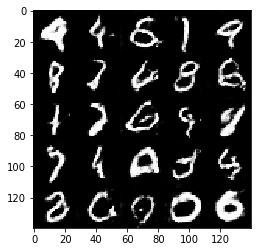

Epoch 2/2... Discriminator Loss: 0.7278... Generator Loss: 1.4616
Epoch 2/2... Discriminator Loss: 0.6889... Generator Loss: 1.4721
Epoch 2/2... Discriminator Loss: 0.7156... Generator Loss: 1.5371
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 0.7637
Epoch 2/2... Discriminator Loss: 0.8698... Generator Loss: 1.1860
Epoch 2/2... Discriminator Loss: 0.9432... Generator Loss: 1.0419
Epoch 2/2... Discriminator Loss: 0.7763... Generator Loss: 1.4417


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/3... Discriminator Loss: 0.5167... Generator Loss: 2.3688
Epoch 1/3... Discriminator Loss: 0.4230... Generator Loss: 3.2246


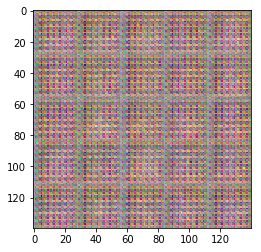

Epoch 1/3... Discriminator Loss: 0.4906... Generator Loss: 3.0216
Epoch 1/3... Discriminator Loss: 0.5891... Generator Loss: 1.9369


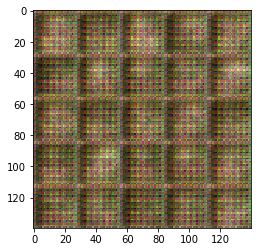

Epoch 1/3... Discriminator Loss: 0.6369... Generator Loss: 2.5550
Epoch 1/3... Discriminator Loss: 0.6225... Generator Loss: 1.7176


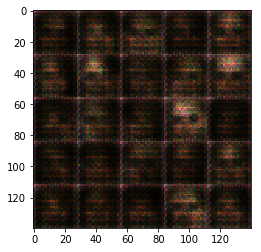

Epoch 1/3... Discriminator Loss: 0.5968... Generator Loss: 2.6144
Epoch 1/3... Discriminator Loss: 0.9935... Generator Loss: 0.9372


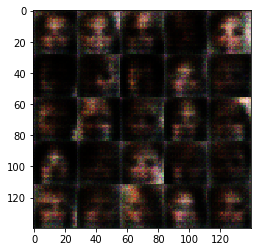

Epoch 1/3... Discriminator Loss: 0.7870... Generator Loss: 2.9136
Epoch 1/3... Discriminator Loss: 0.7113... Generator Loss: 3.0010


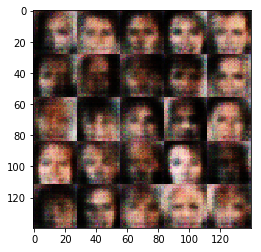

Epoch 1/3... Discriminator Loss: 0.9924... Generator Loss: 0.9010
Epoch 1/3... Discriminator Loss: 0.6893... Generator Loss: 1.5140


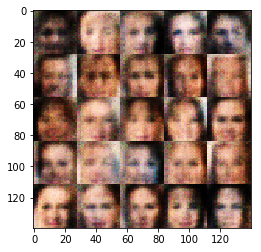

Epoch 1/3... Discriminator Loss: 0.6410... Generator Loss: 1.7786
Epoch 1/3... Discriminator Loss: 0.5849... Generator Loss: 2.1775


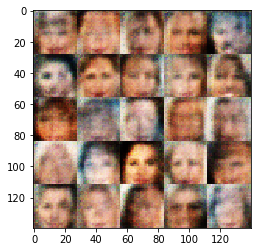

Epoch 1/3... Discriminator Loss: 0.7057... Generator Loss: 1.5318
Epoch 1/3... Discriminator Loss: 1.2495... Generator Loss: 0.7227


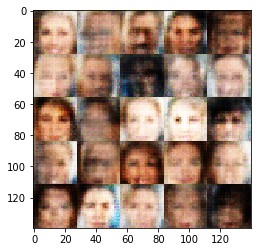

Epoch 1/3... Discriminator Loss: 0.7332... Generator Loss: 1.4584
Epoch 1/3... Discriminator Loss: 0.8781... Generator Loss: 2.0933


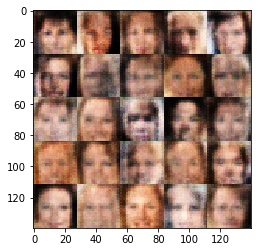

Epoch 1/3... Discriminator Loss: 0.9539... Generator Loss: 0.9487
Epoch 1/3... Discriminator Loss: 0.8908... Generator Loss: 1.0925


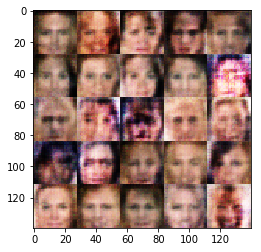

Epoch 1/3... Discriminator Loss: 0.7864... Generator Loss: 1.9962
Epoch 1/3... Discriminator Loss: 1.3456... Generator Loss: 2.8477


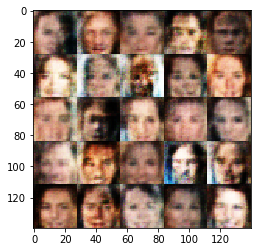

Epoch 1/3... Discriminator Loss: 0.9953... Generator Loss: 2.2707
Epoch 1/3... Discriminator Loss: 0.9971... Generator Loss: 1.9646


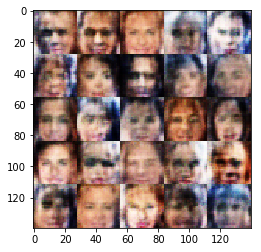

Epoch 1/3... Discriminator Loss: 0.8423... Generator Loss: 2.1016
Epoch 1/3... Discriminator Loss: 1.0544... Generator Loss: 0.8303


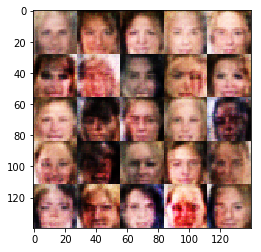

Epoch 1/3... Discriminator Loss: 1.1135... Generator Loss: 0.7496
Epoch 1/3... Discriminator Loss: 0.9170... Generator Loss: 1.4832


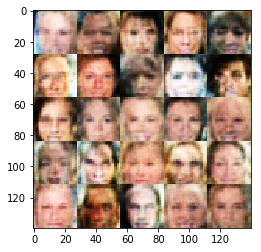

Epoch 1/3... Discriminator Loss: 1.1049... Generator Loss: 0.7344
Epoch 1/3... Discriminator Loss: 0.9181... Generator Loss: 1.3720


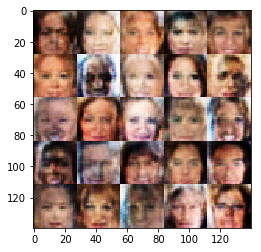

Epoch 1/3... Discriminator Loss: 0.9566... Generator Loss: 1.9113
Epoch 2/3... Discriminator Loss: 1.1461... Generator Loss: 0.7259


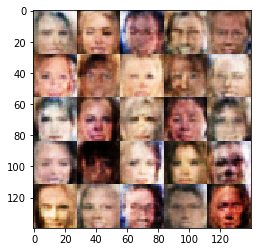

Epoch 2/3... Discriminator Loss: 1.0731... Generator Loss: 0.8020
Epoch 2/3... Discriminator Loss: 0.8682... Generator Loss: 1.2044


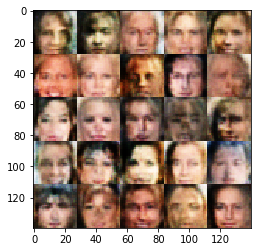

Epoch 2/3... Discriminator Loss: 0.9291... Generator Loss: 1.7781
Epoch 2/3... Discriminator Loss: 1.0140... Generator Loss: 1.0027


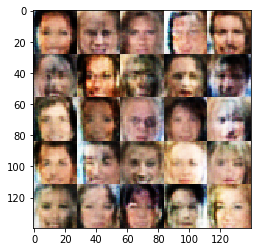

Epoch 2/3... Discriminator Loss: 1.0627... Generator Loss: 1.4256
Epoch 2/3... Discriminator Loss: 0.8354... Generator Loss: 1.2707


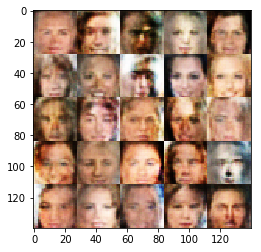

Epoch 2/3... Discriminator Loss: 1.0629... Generator Loss: 0.7800
Epoch 2/3... Discriminator Loss: 1.7843... Generator Loss: 3.1148


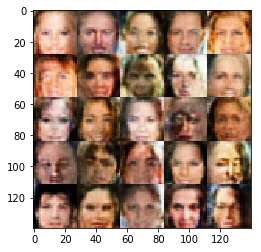

Epoch 2/3... Discriminator Loss: 0.8618... Generator Loss: 2.2124
Epoch 2/3... Discriminator Loss: 0.9741... Generator Loss: 0.9537


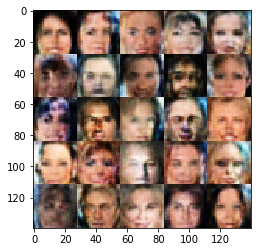

Epoch 2/3... Discriminator Loss: 0.8835... Generator Loss: 1.5862
Epoch 2/3... Discriminator Loss: 0.8355... Generator Loss: 1.3925


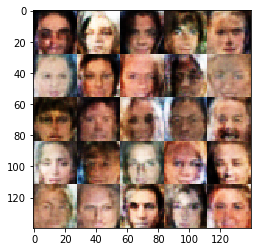

Epoch 2/3... Discriminator Loss: 1.0066... Generator Loss: 1.8837
Epoch 2/3... Discriminator Loss: 1.1374... Generator Loss: 0.7349


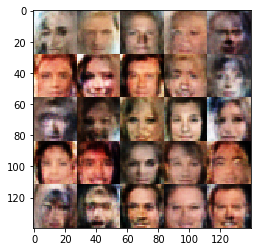

Epoch 2/3... Discriminator Loss: 0.9418... Generator Loss: 1.2916
Epoch 2/3... Discriminator Loss: 0.9119... Generator Loss: 1.0676


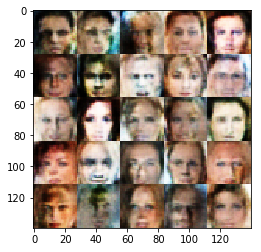

Epoch 2/3... Discriminator Loss: 0.8112... Generator Loss: 1.3261
Epoch 2/3... Discriminator Loss: 1.0072... Generator Loss: 0.8484


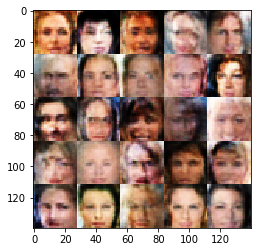

Epoch 2/3... Discriminator Loss: 0.7537... Generator Loss: 1.4303
Epoch 2/3... Discriminator Loss: 0.9634... Generator Loss: 1.0780


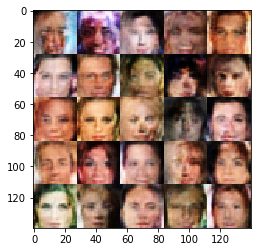

Epoch 2/3... Discriminator Loss: 1.0061... Generator Loss: 1.0551
Epoch 2/3... Discriminator Loss: 0.9045... Generator Loss: 1.2339


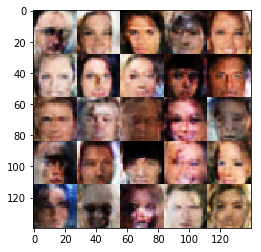

Epoch 2/3... Discriminator Loss: 0.8618... Generator Loss: 1.8713
Epoch 2/3... Discriminator Loss: 0.8919... Generator Loss: 1.1346


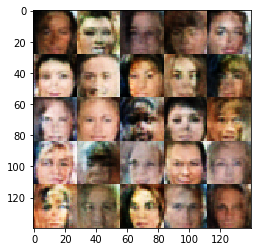

Epoch 2/3... Discriminator Loss: 0.9620... Generator Loss: 0.9372
Epoch 2/3... Discriminator Loss: 0.8224... Generator Loss: 1.3266


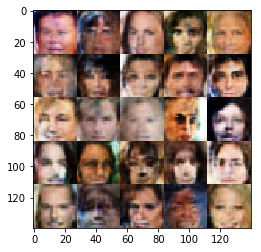

Epoch 2/3... Discriminator Loss: 0.9668... Generator Loss: 1.0872
Epoch 2/3... Discriminator Loss: 0.8403... Generator Loss: 1.2174


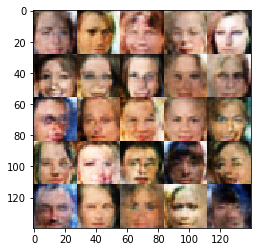

Epoch 2/3... Discriminator Loss: 1.0557... Generator Loss: 1.5037
Epoch 2/3... Discriminator Loss: 0.8811... Generator Loss: 1.1763


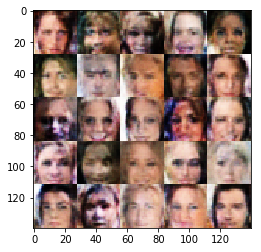

Epoch 2/3... Discriminator Loss: 0.8451... Generator Loss: 1.5719
Epoch 3/3... Discriminator Loss: 0.9891... Generator Loss: 1.1168


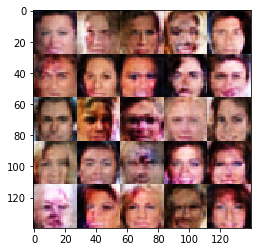

Epoch 3/3... Discriminator Loss: 0.8253... Generator Loss: 1.2677
Epoch 3/3... Discriminator Loss: 1.1836... Generator Loss: 0.6885


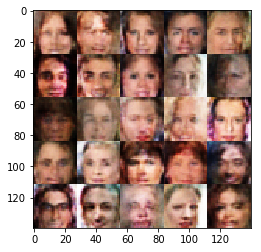

Epoch 3/3... Discriminator Loss: 1.1100... Generator Loss: 0.7141
Epoch 3/3... Discriminator Loss: 1.0002... Generator Loss: 0.9062


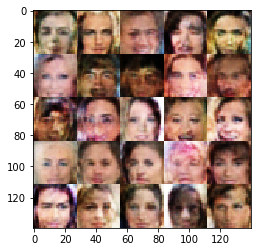

Epoch 3/3... Discriminator Loss: 0.9065... Generator Loss: 1.3217
Epoch 3/3... Discriminator Loss: 0.7794... Generator Loss: 1.6036


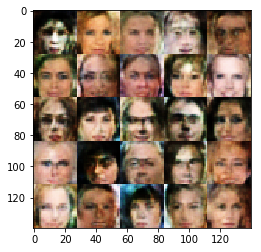

Epoch 3/3... Discriminator Loss: 0.8399... Generator Loss: 1.1854
Epoch 3/3... Discriminator Loss: 0.7408... Generator Loss: 1.4521


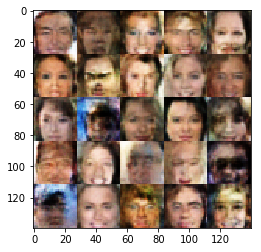

Epoch 3/3... Discriminator Loss: 0.7836... Generator Loss: 1.5491
Epoch 3/3... Discriminator Loss: 1.0127... Generator Loss: 0.8728


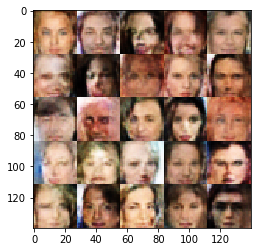

Epoch 3/3... Discriminator Loss: 0.9854... Generator Loss: 0.9922
Epoch 3/3... Discriminator Loss: 1.0338... Generator Loss: 1.5843


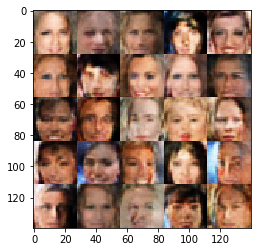

Epoch 3/3... Discriminator Loss: 0.9201... Generator Loss: 1.3090
Epoch 3/3... Discriminator Loss: 0.8445... Generator Loss: 1.2034


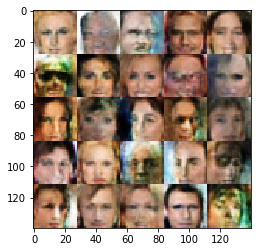

Epoch 3/3... Discriminator Loss: 1.0720... Generator Loss: 0.8164
Epoch 3/3... Discriminator Loss: 0.9219... Generator Loss: 1.3882


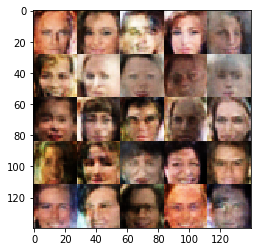

Epoch 3/3... Discriminator Loss: 0.7650... Generator Loss: 1.6954
Epoch 3/3... Discriminator Loss: 0.9249... Generator Loss: 1.0975


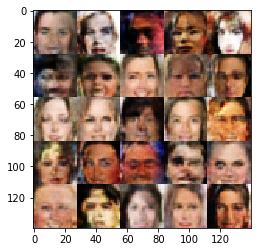

Epoch 3/3... Discriminator Loss: 1.1903... Generator Loss: 1.8602
Epoch 3/3... Discriminator Loss: 1.0285... Generator Loss: 1.2682


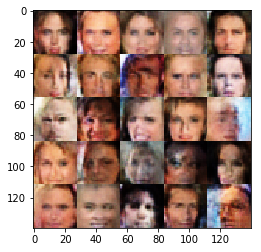

Epoch 3/3... Discriminator Loss: 0.9829... Generator Loss: 1.1264
Epoch 3/3... Discriminator Loss: 0.9353... Generator Loss: 1.1498


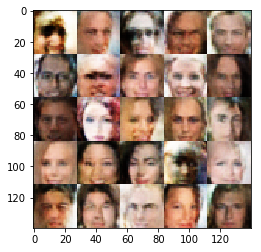

Epoch 3/3... Discriminator Loss: 0.9639... Generator Loss: 1.0315
Epoch 3/3... Discriminator Loss: 0.8746... Generator Loss: 1.2674


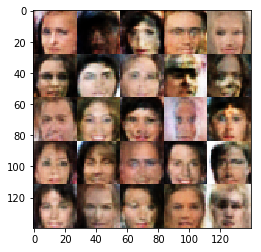

Epoch 3/3... Discriminator Loss: 0.8580... Generator Loss: 1.1319
Epoch 3/3... Discriminator Loss: 0.6026... Generator Loss: 1.9160


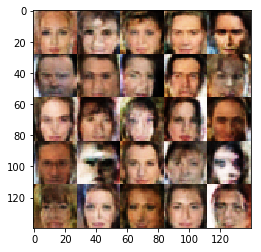

Epoch 3/3... Discriminator Loss: 1.0094... Generator Loss: 0.9953
Epoch 3/3... Discriminator Loss: 0.9002... Generator Loss: 1.3917


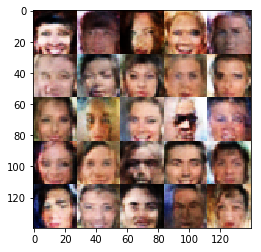

Epoch 3/3... Discriminator Loss: 0.9506... Generator Loss: 1.5921
Epoch 3/3... Discriminator Loss: 0.9606... Generator Loss: 1.0839


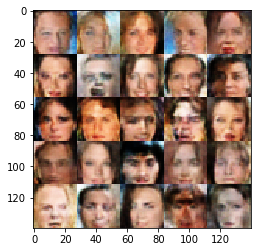

In [16]:
batch_size = 128
z_dim = 100
learning_rate = 0.00005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.